# GUI

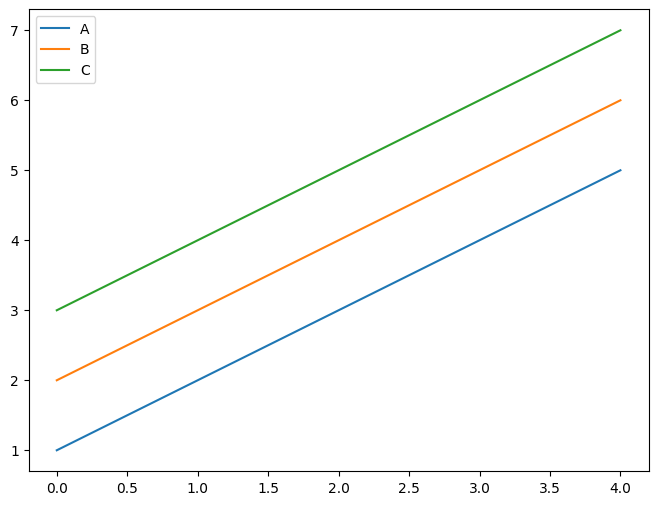

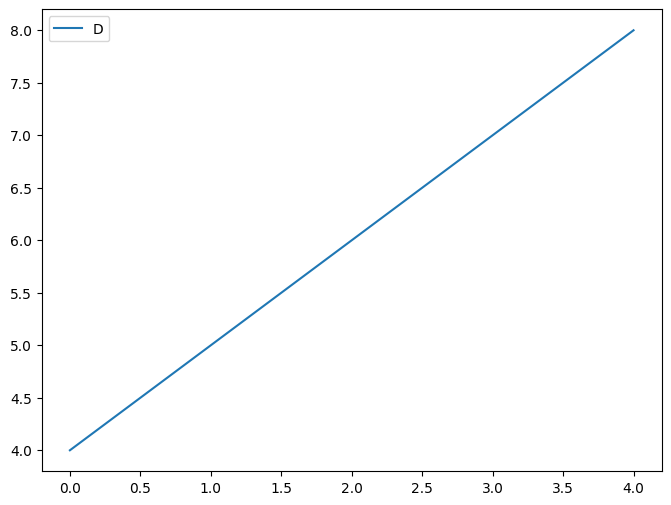

In [3]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import pandas as pd

def plot_from_dataframe(parent_frame, df, columns_to_plot, figsize=(8, 6)):
    class PlotApp(tk.Frame):
        def __init__(self, parent, df, columns_to_plot, figsize):
            super().__init__(parent)
            self.grid(row=0, column=0, sticky='nsew')

            self.df = df
            self.columns_to_plot = columns_to_plot

            # Matplotlib-Figur und -Achsen erstellen mit spezifischer Größe
            self.fig, self.ax = plt.subplots(figsize=figsize)

            # Dictionary für Linienobjekte
            self.lines = {}

            # Kurven initial plotten
            for column in self.columns_to_plot:
                line, = self.ax.plot(self.df.index, self.df[column], label=column)
                self.lines[column] = line

            # Legende hinzufügen
            self.ax.legend()

            # Frame für das Diagramm erstellen und auf die gewünschte Größe setzen
            self.plot_frame = tk.Frame(self, width=figsize[0]*100, height=figsize[1]*100)
            self.plot_frame.grid(row=0, column=0, sticky='nsew')

            # Matplotlib-Figur in den Frame einbetten
            self.canvas = FigureCanvasTkAgg(self.fig, master=self.plot_frame)
            self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

            # Kontrollkästchen für Kurven hinzufügen
            self.checkbox_frame = tk.Frame(self)
            self.checkbox_frame.grid(row=1, column=0, sticky='ew')

            self.variables = {}
            for column in self.columns_to_plot:
                var = tk.BooleanVar(value=True)
                checkbox = ttk.Checkbutton(self.checkbox_frame, text=column, variable=var, command=self.update_plot)
                checkbox.pack(side=tk.LEFT)
                self.variables[column] = var

            # Grid layout configuration for resizing
            self.grid_rowconfigure(0, weight=1)
            self.grid_columnconfigure(0, weight=1)

        def update_plot(self):
            # Kurven je nach Kontrollkästchen-Zustand ein-/ausblenden
            for column, line in self.lines.items():
                line.set_visible(self.variables[column].get())
            
            # Plot aktualisieren
            self.canvas.draw()

    # PlotApp in den übergebenen Frame einbetten
    PlotApp(parent_frame, df, columns_to_plot, figsize).grid(row=0, column=0, sticky='nsew')

# Beispiel-Daten für das DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [2, 3, 4, 5, 6],
    'C': [3, 4, 5, 6, 7],
    'D': [4, 5, 6, 7, 8]
}
df = pd.DataFrame(data)

# Tkinter-Anwendung mit Notebook erstellen
root = tk.Tk()
root.title("Notebook mit Plots")

notebook = ttk.Notebook(root)
notebook.pack(fill=tk.BOTH, expand=1)

# Erster Tab
frame1 = ttk.Frame(notebook)
notebook.add(frame1, text="Tab 1")

# Zweiter Tab
frame2 = ttk.Frame(notebook)
notebook.add(frame2, text="Tab 2")

# Dritter Tab (Test)
test_frame = ttk.Frame(notebook)
notebook.add(test_frame, text="Test")

# Vierter Tab (Zusätzlich)
frame4 = ttk.Frame(notebook)
notebook.add(frame4, text="Vierter Tab")

# Plots in den jeweiligen Tabs anzeigen
plot_from_dataframe(test_frame, df, ['A', 'B', 'C'], figsize=(8, 6))
plot_from_dataframe(frame4, df, ['D'], figsize=(8, 6))

# Vierter Tab (Zusätzlich)
frame5 = ttk.Frame(notebook)
notebook.add(frame5, text="5 Tab")

# Grid layout configuration for resizing
test_frame.grid_rowconfigure(0, weight=1)
test_frame.grid_columnconfigure(0, weight=1)
frame4.grid_rowconfigure(0, weight=1)
frame4.grid_columnconfigure(0, weight=1)

root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import pandas as pd

def create_output_label(parent_frame, text):
    class OutputLabel(tk.Frame):
        def __init__(self, parent, text):
            super().__init__(parent)
            self.pack(fill=tk.BOTH, expand=1)

            # Label erstellen und in den Frame einfügen
            self.label = tk.Label(self, text=text, anchor="center", font=("Arial", 14))
            self.label.pack(pady=20)

    # OutputLabel in den übergebenen Frame einbetten
    OutputLabel(parent_frame, text).pack(fill=tk.BOTH, expand=1)


def plot_from_dataframe(parent_frame, df, columns_to_plot, figsize=(8, 6)):
    class PlotApp(tk.Frame):
        def __init__(self, parent, df, columns_to_plot, figsize):
            super().__init__(parent)
            self.grid(row=0, column=0, sticky='nsew')

            self.df = df
            self.columns_to_plot = columns_to_plot

            # Matplotlib-Figur und -Achsen erstellen mit spezifischer Größe
            self.fig, self.ax = plt.subplots(figsize=figsize)

            # Dictionary für Linienobjekte
            self.lines = {}

            # Kurven initial plotten
            for column in self.columns_to_plot:
                line, = self.ax.plot(self.df.index, self.df[column], label=column)
                self.lines[column] = line

            # Legende hinzufügen
            self.ax.legend()

            # Frame für das Diagramm erstellen und auf die gewünschte Größe setzen
            self.plot_frame = tk.Frame(self, width=figsize[0]*100, height=figsize[1]*100)
            self.plot_frame.grid(row=0, column=0, sticky='nsew')

            # Matplotlib-Figur in den Frame einbetten
            self.canvas = FigureCanvasTkAgg(self.fig, master=self.plot_frame)
            self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

            # Kontrollkästchen für Kurven hinzufügen
            self.checkbox_frame = tk.Frame(self)
            self.checkbox_frame.grid(row=1, column=0, sticky='ew')

            self.variables = {}
            for column in self.columns_to_plot:
                var = tk.BooleanVar(value=True)
                checkbox = ttk.Checkbutton(self.checkbox_frame, text=column, variable=var, command=self.update_plot)
                checkbox.pack(side=tk.LEFT)
                self.variables[column] = var

            # Grid layout configuration for resizing
            self.grid_rowconfigure(0, weight=1)
            self.grid_columnconfigure(0, weight=1)

        def update_plot(self):
            # Kurven je nach Kontrollkästchen-Zustand ein-/ausblenden
            for column, line in self.lines.items():
                line.set_visible(self.variables[column].get())
            
            # Plot aktualisieren
            self.canvas.draw()

    # PlotApp in den übergebenen Frame einbetten
    PlotApp(parent_frame, df, columns_to_plot, figsize).grid(row=0, column=0, sticky='nsew')

# Beispiel-Daten für das DataFrame
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [2, 3, 4, 5, 6],
    'C': [3, 4, 5, 6, 7],
    'D': [4, 5, 6, 7, 8]
}
df = pd.DataFrame(data)

# Tkinter-Anwendung mit Notebook erstellen
root = tk.Tk()
root.title("Notebook mit Plots")

notebook = ttk.Notebook(root)
notebook.pack(fill=tk.BOTH, expand=1)

# Erster Tab
frame1 = ttk.Frame(notebook)
notebook.add(frame1, text="Tab 1")

# Zweiter Tab
frame2 = ttk.Frame(notebook)
notebook.add(frame2, text="Tab 2")

# Dritter Tab (Test)
test_frame = ttk.Frame(notebook)
notebook.add(test_frame, text="Test")

# Vierter Tab (Zusätzlich)
frame4 = ttk.Frame(notebook)
notebook.add(frame4, text="Vierter Tab")

# Zweiter Tab
frame5 = ttk.Frame(notebook)
notebook.add(frame5, text="Tab 5")
create_output_label(frame5, "Dies ist ein Ausgabe-Label \nmit etwas Text")

# Plots in den jeweiligen Tabs anzeigen
plot_from_dataframe(test_frame, df, ['A', 'B', 'C'], figsize=(8, 6))
plot_from_dataframe(frame4, df, ['D'], figsize=(8, 6))

# Grid layout configuration for resizing
test_frame.grid_rowconfigure(0, weight=1)
test_frame.grid_columnconfigure(0, weight=1)
frame4.grid_rowconfigure(0, weight=1)
frame4.grid_columnconfigure(0, weight=1)

root.mainloop()


In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np

class PlotApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Plot App")

        # Create a frame for the plot
        self.plot_frame = ttk.Frame(self.root)
        self.plot_frame.pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        # Create a canvas for the plot
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.plot_frame)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=True)

        # Create a frame for the controls
        self.control_frame = ttk.Frame(self.root)
        self.control_frame.pack(side=tk.BOTTOM, fill=tk.X)

        # Add checkbuttons for showing/hiding plots
        self.plot1_var = tk.BooleanVar(value=True)
        self.plot2_var = tk.BooleanVar(value=True)

        self.plot1_check = ttk.Checkbutton(
            self.control_frame, text="Show Plot 1", variable=self.plot1_var, command=self.update_plot
        )
        self.plot1_check.pack(side=tk.LEFT, padx=10)

        self.plot2_check = ttk.Checkbutton(
            self.control_frame, text="Show Plot 2", variable=self.plot2_var, command=self.update_plot
        )
        self.plot2_check.pack(side=tk.LEFT, padx=10)

        # Initialize the plots
        self.x = np.linspace(0, 10, 100)
        self.plot1, = self.ax.plot(self.x, np.sin(self.x), label="Sine Wave")
        self.plot2, = self.ax.plot(self.x, np.cos(self.x), label="Cosine Wave")

        self.ax.legend()
        self.canvas.draw()

    def update_plot(self):
        # Show/hide plot 1
        self.plot1.set_visible(self.plot1_var.get())

        # Show/hide plot 2
        self.plot2.set_visible(self.plot2_var.get())

        self.ax.legend()
        self.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = PlotApp(root)
    root.mainloop()


In [ ]:
import pandas as pd
import plotly.graph_objs as go
import plotly.io as pio
from tkinter import Tk, Frame
from tkinterweb import HtmlFrame

# Angenommen, df_results ist dein DataFrame
# df_results = pd.DataFrame({...})
# Beispiel-DataFrame erstellen
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6],
    'D': [6, 5, 4, 3, 2]
}
df_results = pd.DataFrame(data)

# Erstellen des interaktiven Plotly-Plots
fig = go.Figure()

for column in df_results.columns:
    fig.add_trace(go.Scatter(x=df_results.index, y=df_results[column], mode='lines', name=column))

fig.update_layout(
    title='Alle Spalten',
    xaxis_title='Index',
    yaxis_title='Werte',
    legend_title='Spalten'
)

# Speichern des Plotly-Plots als HTML-Datei
html_str = pio.to_html(fig, full_html=False)

# Erstellen des tkinter-Fensters
root = Tk()
root.title("Interaktiver Plotly-Plot")

# Frame für das HtmlFrame-Widget
frame = Frame(root)
frame.pack(fill='both', expand=True)

# HtmlFrame-Widget
html_frame = HtmlFrame(frame)
html_frame.load_html(html_str)
html_frame.pack(fill='both', expand=True)

# Hauptschleife von tkinter starten
root.mainloop()


# Lastprofil

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
import plotly.graph_objs as go
import numpy as np

# Funktion zur Umwandlung von Plotly-Figur in eine Matplotlib-Figur
def plotly_to_matplotlib(fig):
    import plotly.io as pio
    from io import BytesIO
    import PIL.Image
    img_bytes = pio.to_image(fig, format='png')
    img = PIL.Image.open(BytesIO(img_bytes))
    return img

# Beispiel-Plotly-Diagramm erstellen
x = np.linspace(0, 10, 100)
y = np.sin(x)

plotly_fig = go.Figure(data=go.Scatter(x=x, y=y, mode='lines', name='Sine Wave'))
plotly_fig.update_layout(title='Sine Wave', xaxis_title='x', yaxis_title='y')

# Hauptfenster der Tkinter-Anwendung erstellen
root = tk.Tk()
root.title("Plotly Diagramm in Tkinter")

# Plotly-Figur in eine Matplotlib-Figur umwandeln
img = plotly_to_matplotlib(plotly_fig)

# Matplotlib-Figur auf einem Canvas anzeigen
fig = Figure()
ax = fig.add_subplot(111)
ax.imshow(img)
ax.axis('off')  # Achsen ausblenden

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)

# Haupt-Loop der Tkinter-Anwendung starten
root.mainloop()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Annahmen
num_tents = 10
lighting_power = 10  # Watt pro Zelt
charging_power = 5  # Watt pro Zelt
fridge_power = 60  # Watt, verteilt auf alle Zelte

# Lastprofile über 24 Stunden (1-Stunden-Intervalle)
hours = np.arange(24)
lighting_profile = np.zeros(24)
charging_profile = np.zeros(24)
fridge_profile = np.ones(24) * fridge_power / num_tents

# Beleuchtungsprofil (18-23 Uhr)
lighting_profile[18:24] = lighting_power * num_tents
lighting_profile[0:6] = lighting_power * num_tents

# Ladegeräteprofil (8-22 Uhr)
charging_profile[8:23] = charging_power * num_tents

# Gesamtlastprofil
total_profile = lighting_profile + charging_profile + fridge_profile

# Plotten des Lastprofils
plt.figure(figsize=(10, 6))
plt.plot(hours, lighting_profile, label='Beleuchtung')
plt.plot(hours, charging_profile, label='Ladegeräte')
plt.plot(hours, fridge_profile, label='Kühlschrank')
plt.plot(hours, total_profile, label='Gesamte Last', linewidth=2, linestyle='--')
plt.xlabel('Stunde des Tages')
plt.ylabel('Leistung (Watt)')
plt.title('Lastprofil für ein Camp mit 10 Zelten')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Beispiel-DataFrame erstellen
data = {
    'A': [1, 2, 3, 4, 5],
    'B': [5, 4, 3, 2, 1],
    'C': [2, 3, 4, 5, 6],
    'D': [6, 5, 4, 3, 2]
}
df = pd.DataFrame(data)

# Plotten jeder Spalte in separaten Diagrammen
for column in df.columns:
    plt.figure()
    df[column].plot(title=column)
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.show()

# Plotten aller Spalten in einem einzigen Diagramm
df.plot()
plt.title('Alle Spalten')
plt.xlabel('Index')
plt.ylabel('Werte')
plt.legend(loc='best')
plt.show()


In [ ]:
import pandas as pd

# Definition der Zeitintervalle und Lasten
time_intervals = [
    ('00:00', '06:00', 200),
    ('06:00', '09:00', 500),
    ('09:00', '18:00', 300),
    ('18:00', '22:00', 600),
    ('22:00', '00:00', 300)
]

# Anzahl der Zelte
num_tents = 10

# Erstellung eines leeren DataFrames
time_range = pd.date_range('00:00', '23:00', freq='H')
df = pd.DataFrame(index=time_range, columns=['Leistungsbedarf Zelt'])

# Füllen des DataFrames mit Lastprofil-Daten
for start, end, load in time_intervals:
    mask = (df.index.time >= pd.to_datetime(start).time()) & (df.index.time < pd.to_datetime(end).time())
    df.loc[mask, 'Leistungsbedarf Zelt'] = load

# Korrektur für den Zeitbereich '22:00' bis '00:00'
mask = (df.index.time >= pd.to_datetime('22:00').time()) & (df.index.time < pd.to_datetime('23:59').time())
df.loc[mask, 'Leistungsbedarf Zelt'] = 300 

df['Leistungsbedarf Wohnbereich'] = df['Leistungsbedarf Zelt'] * num_tents

# Anzeigen des DataFrames
print(df)



# Batteriespeicher 

In [ ]:
# Bat 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definition der Parameter
capacity = 100  # Kapazität in kWh
charge_efficiency = 0.95  # Ladeeffizienz
discharge_efficiency = 0.95  # Entladeeffizienz
max_charge_rate = 10  # Maximaler Ladestrom in kW
max_discharge_rate = 10  # Maximaler Entladestrom in kW
initial_energy = 50  # Anfangsenergie in kWh

# Zeitreihe für die Simulation (z.B. stündliche Werte für 24 Stunden)
time_steps = 24 * 7
charge_discharge_profile = np.random.uniform(-max_discharge_rate, max_charge_rate, time_steps)

# Initialisierung der Energiespeichermenge
energy_storage = np.zeros(time_steps)
energy_storage[0] = initial_energy

# Simulation der Lade- und Entladevorgänge
for t in range(1, time_steps):
    if charge_discharge_profile[t] > 0:  # Ladevorgang
        energy_storage[t] = min(capacity, energy_storage[t-1] + charge_discharge_profile[t] * charge_efficiency)
    else:  # Entladevorgang
        energy_storage[t] = max(0, energy_storage[t-1] + charge_discharge_profile[t] * discharge_efficiency)

# Erstellung eines DataFrame zur Analyse
df = pd.DataFrame({
    'Hour': np.arange(time_steps),
    'Charge/Discharge Profile (kW)': charge_discharge_profile,
    'Energy Storage (kWh)': energy_storage
})

# Plotten der Ergebnisse
plt.figure(figsize=(10, 5))
plt.plot(df['Hour'], df['Energy Storage (kWh)'], label='Energy Storage (kWh)')
plt.plot(df['Hour'], df['Charge/Discharge Profile (kW)'], label='Charge/Discharge Profile (kW)', linestyle='--')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh) / Power (kW)')
plt.title('Energy Storage Simulation')
plt.legend()
plt.grid(True)
plt.show()
print(f"Summ")


In [ ]:
# Bat 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definition der Parameter
capacity = 100  # Kapazität in kWh
charge_efficiency = 0.95  # Ladeeffizienz
discharge_efficiency = 0.95  # Entladeeffizienz
max_charge_rate = 10  # Maximaler Ladestrom in kW
max_discharge_rate = 10  # Maximaler Entladestrom in kW
initial_energy = 50  # Anfangsenergie in kWh

# Zeitreihe für die Simulation (z.B. stündliche Werte für 24 Stunden)
time_steps = 24
np.random.seed(42)
pv_generation = np.random.uniform(0, 5, time_steps)  # PV-Erzeugung in kW
wind_generation = np.random.uniform(0, 3, time_steps)  # Windkraft-Erzeugung in kW
energy_consumption = np.random.uniform(2, 7, time_steps)  # Verbrauch in kW

# Initialisierung der Energiespeichermenge
energy_storage = np.zeros(time_steps)
energy_storage[0] = initial_energy

# Simulation der Lade- und Entladevorgänge
for t in range(1, time_steps):
    available_energy = pv_generation[t] + wind_generation[t]
    net_energy = available_energy - energy_consumption[t]
    
    if net_energy > 0:  # Überschussenergie
        charge_energy = min(capacity - energy_storage[t-1], net_energy * charge_efficiency, max_charge_rate)
        energy_storage[t] = energy_storage[t-1] + charge_energy
    else:  # Energiebedarf
        discharge_energy = min(energy_storage[t-1], -net_energy / discharge_efficiency, max_discharge_rate)
        energy_storage[t] = energy_storage[t-1] - discharge_energy

# Erstellung eines DataFrame zur Analyse
df = pd.DataFrame({
    'Hour': np.arange(time_steps),
    'PV Generation (kW)': pv_generation,
    'Wind Generation (kW)': wind_generation,
    'Energy Consumption (kW)': energy_consumption,
    'Net Energy (kW)': pv_generation + wind_generation - energy_consumption,
    'Energy Storage (kWh)': energy_storage
})

# Plotten der Ergebnisse
plt.figure(figsize=(12, 6))
plt.plot(df['Hour'], df['Energy Storage (kWh)'], label='Energy Storage (kWh)')
plt.plot(df['Hour'], df['Net Energy (kW)'], label='Net Energy (kW)', linestyle='--')
plt.plot(df['Hour'], df['PV Generation (kW)'], label='PV Generation (kW)', linestyle='-.')
plt.plot(df['Hour'], df['Wind Generation (kW)'], label='Wind Generation (kW)', linestyle=':')
plt.plot(df['Hour'], df['Energy Consumption (kW)'], label='Energy Consumption (kW)', linestyle='-')
plt.xlabel('Hour')
plt.ylabel('Energy (kWh) / Power (kW)')
plt.title('Energy Storage with PV and Wind Generation')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definition der Parameter
capacity = 100  # Kapazität in kWh
charge_efficiency = 0.95  # Ladeeffizienz
discharge_efficiency = 0.95  # Entladeeffizienz
max_charge_rate = 10  # Maximaler Ladestrom in kW
max_discharge_rate = 10  # Maximaler Entladestrom in kW
initial_energy = 50  # Anfangsenergie in kWh

# Zeitreihe für die Simulation (z.B. stündliche Werte für 24 Stunden)
time_steps = 24 * 1
pv_power = np.random.uniform(0, 12, time_steps)  # PV-Leistung in kW
wind_power = np.random.uniform(0, 8, time_steps)  # Windkraftleistung in kW
load_demand = np.random.uniform(5, 15, time_steps)  # Verbrauch in kW

# Initialisierung der Energiespeichermenge
energy_storage = np.zeros(time_steps)
energy_storage[0] = initial_energy

# Simulation der Regelung
for t in range(1, time_steps):
    # Gesamte Eingangsleistung
    total_input = pv_power[t] + wind_power[t]
    
    # Verbrauchsbedarf
    net_load = load_demand[t]

    # Regelungslogik
    if total_input > net_load:  # Überschussenergie
        surplus = total_input - net_load
        energy_storage[t] = min(capacity, energy_storage[t-1] + surplus * charge_efficiency)
    else:  # Energiebedarf
        deficit = net_load - total_input
        energy_storage[t] = max(0, energy_storage[t-1] - deficit * discharge_efficiency)

# Erstellung eines DataFrame zur Analyse
df = pd.DataFrame({
    'Hour': np.arange(time_steps),
    'PV Power (kW)': pv_power,
    'Wind Power (kW)': wind_power,
    'Load Demand (kW)': load_demand,
    'Energy Storage (kWh)': energy_storage
})

# Plotten der Ergebnisse mit zwei y-Achsen
fig, ax1 = plt.subplots(figsize=(12, 6))

# Erste Achse (links) für die Energie (kWh)
ax1.plot(df['Hour'], df['Energy Storage (kWh)'], label='Energy Storage (kWh)', color='tab:blue')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Energy (kWh)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.legend(loc='upper left')
ax1.grid(True)

# Zweite Achse (rechts) für die Leistung (kW)
ax2 = ax1.twinx()
ax2.plot(df['Hour'], df['PV Power (kW)'], label='PV Power (kW)', color='tab:orange')
ax2.plot(df['Hour'], df['Wind Power (kW)'], label='Wind Power (kW)', color='tab:green')
ax2.plot(df['Hour'], df['Load Demand (kW)'], label='Load Demand (kW)', linestyle='--', color='tab:red')
ax2.set_ylabel('Power (kW)', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.legend(loc='upper right')

# Titel und Anzeige
plt.title('Energy Storage Management Simulation')
fig.tight_layout()  # um sicherzustellen, dass alles gut platziert ist
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Annahmen
# Energieverbrauch (kW)
consumption = {
    'leadership': 5,
    'catering': 3,
    'living': 1
}

# Anzahl der Zelte
num_tents = 10

# PV-Anlagenleistung (kW)
pv_capacity_per_tent = 1.4  # 4 Module à 350W

# Effizienz der PV-Anlagen
pv_efficiency = 0.7

# Batteriespeicher (kWh)
battery_capacity = 20
battery_state_of_charge = 10  # Initialer Ladezustand (kWh)

# Simulationszeitraum (24 Stunden)
time_steps = 24
time = np.arange(time_steps)

# Simulierte PV-Erzeugung (kW)
# Für Einfachheit nehmen wir eine sinusförmige Kurve an
pv_generation = pv_capacity_per_tent * num_tents * pv_efficiency * np.sin(np.pi * time / time_steps)

# Initialisierung des Energieverbrauchs
total_consumption = np.zeros(time_steps)
total_consumption[:12] = consumption['leadership'] + consumption['catering'] + num_tents * consumption['living']  # 12 Stunden Schicht
total_consumption[12:] = consumption['leadership'] + consumption['catering']  # Führung und Verpflegung laufen weiter

# Batteriespeicherregelung
battery_soc = np.zeros(time_steps)
battery_soc[0] = battery_state_of_charge

# Energiemanagement-Logik
for t in range(1, time_steps):
    # Berechnung des Überschusses oder Defizits
    surplus = pv_generation[t] - total_consumption[t]
    
    if surplus > 0:
        # Überschuss: Batterien laden
        battery_soc[t] = min(battery_soc[t-1] + surplus, battery_capacity)
    else:
        # Defizit: Batterien entladen
        battery_soc[t] = max(battery_soc[t-1] + surplus, 0)
    
    # Regel zur Minimierung von Ausfällen
    if battery_soc[t] == 0 and surplus < 0:
        # Nicht-kritische Lasten abschalten, um kritische Lasten zu decken
        total_consumption[t] = consumption['leadership'] + consumption['catering']

# Visualisierung der Ergebnisse
plt.figure(figsize=(12, 8))
plt.plot(time, pv_generation, label='PV-Erzeugung (kW)')
plt.plot(time, total_consumption, label='Energieverbrauch (kW)')
plt.plot(time, battery_soc, label='Batteriestatus (kWh)')
plt.axhline(y=consumption['leadership'] + consumption['catering'], color='r', linestyle='--', label='Kritische Last (kW)')
plt.xlabel('Zeit (Stunden)')
plt.ylabel('Leistung (kW) / Energie (kWh)')
plt.title('Simulation der Laststeuerung und des Energiemanagements')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Lastalgorithmus mit Schleife 
import time

# Beispielhafte Datenstruktur für Verbraucher
consumers = {
    "leadership": {"priority": 1, "power": 5000, "status": "off"},
    "catering": {"priority": 1, "power": 3000, "status": "off"},
    "residential_1": {"priority": 2, "power": 1000, "status": "off"},
    "residential_2": {"priority": 2, "power": 1000, "status": "off"},
    # Weitere Verbraucher können hier hinzugefügt werden
}

# Beispielhafte Datenstruktur für PV- und WEA-Leistung
renewable_energy = {
    "pv": 0,  # Aktuelle PV-Leistung
    "wea": 0,  # Aktuelle WEA-Leistung
}

# Beispielhafte Datenstruktur für Batteriespeicher
battery = {
    "capacity": 20000,  # Gesamtkapazität in Wh
    "soc": 50,  # State of Charge in Prozent
}

# Funktion zur Aktualisierung der Erzeugungsdaten (Platzhalter)
def update_renewable_energy():
    renewable_energy["pv"] = 2000  # Beispiel: 2 kW von PV
    renewable_energy["wea"] = 1000  # Beispiel: 1 kW von WEA

# Funktion zur Aktualisierung des Batteriestands (Platzhalter)
def update_battery_storage(energy_surplus):
    global battery
    # Einfaches Modell: Lade- oder Entladebatterie basierend auf Energieüberschuss
    if energy_surplus > 0:
        battery["soc"] += energy_surplus / battery["capacity"] * 100
    else:
        battery["soc"] += energy_surplus / battery["capacity"] * 100

    # Begrenzung des Ladezustands auf 20-80%
    battery["soc"] = max(20, min(80, battery["soc"]))

# Hauptlogik zur Laststeuerung
def manage_load():
    global consumers
    total_power_demand = sum([c["power"] for c in consumers.values() if c["status"] == "on"])
    total_renewable_power = renewable_energy["pv"] + renewable_energy["wea"]
    energy_surplus = total_renewable_power - total_power_demand

    # Aktualisiere den Batteriestand basierend auf Energieüberschuss/-defizit
    update_battery_storage(energy_surplus)

    # Priorisierte Laststeuerung
    for consumer_name, consumer in sorted(consumers.items(), key=lambda item: item[1]["priority"]):
        if energy_surplus >= 0 or battery["soc"] > 20:
            # Schalte Verbraucher ein, wenn genügend erneuerbare Energie oder Batterie > 20%
            consumers[consumer_name]["status"] = "on"
            energy_surplus -= consumer["power"]
        else:
            # Schalte Verbraucher aus, wenn nicht genügend Energie vorhanden
            consumers[consumer_name]["status"] = "off"

    # Logik für kritische Lasten
    for consumer_name, consumer in consumers.items():
        if consumer["priority"] == 1 and consumer["status"] == "off":
            # Wenn eine kritische Last ausgeschaltet ist, prüfe den Dieselgenerator
            print(f"Warning: Critical load {consumer_name} is off. Consider using Diesel generator.")
            # Hier könnte man die Logik zur manuellen Einschaltung des Dieselgenerators hinzufügen

# Endlosschleife zur periodischen Aktualisierung und Laststeuerung
while True:
    update_renewable_energy()
    manage_load()
    # Beispielhafte Ausgabe zur Überwachung
    print(f"Battery SOC: {battery['soc']}%")
    for consumer_name, consumer in consumers.items():
        print(f"{consumer_name}: {consumer['status']} (Power: {consumer['power']}W)")
    time.sleep(60)  # Wartezeit von 60 Sekunden zwischen den Aktualisierungen


# Wind 

In [ ]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import matplotlib.pyplot as plt
import numpy as np

class PlotApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Interactive Plot in Tkinter")

        # Create a frame for the plot
        self.frame = ttk.Frame(root)
        self.frame.pack(fill=tk.BOTH, expand=1)

        # Create a matplotlib figure and axes
        self.fig, self.ax = plt.subplots()
        
        # Create initial plot
        self.plot_data()

        # Create a canvas and place the matplotlib figure on it
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.frame)
        self.canvas.draw()
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)

        # Add a toolbar for interactive features
        self.toolbar = NavigationToolbar2Tk(self.canvas, self.frame)
        self.toolbar.update()
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)

        # Add a button to update the plot
        self.update_button = ttk.Button(root, text="Update Plot", command=self.update_plot)
        self.update_button.pack(side=tk.BOTTOM)

    def plot_data(self):
        # Generate some sample data
        x = np.linspace(0, 10, 100)
        y = np.sin(x)

        # Plot data
        self.ax.plot(x, y, label='Sinus Curve')
        self.ax.legend()
        self.ax.set_title("Interactive Plot")
        self.ax.set_xlabel("X-axis")
        self.ax.set_ylabel("Y-axis")

    def update_plot(self):
        # Clear the existing plot
        self.ax.clear()

        # Generate new data
        x = np.linspace(0, 10, 100)
        y = np.cos(x)

        # Plot new data
        self.ax.plot(x, y, label='Cosine Curve', color='red')
        self.ax.legend()
        self.ax.set_title("Updated Interactive Plot")
        self.ax.set_xlabel("X-axis")
        self.ax.set_ylabel("Y-axis")

        # Redraw the canvas
        self.canvas.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = PlotApp(root)
    root.mainloop()


In [ ]:
import sys
import numpy as np
from PyQt5.QtWidgets import QApplication, QMainWindow, QVBoxLayout, QPushButton, QWidget
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas, NavigationToolbar2QT as NavigationToolbar
import matplotlib.pyplot as plt

class PlotApp(QMainWindow):
    def __init__(self):
        super().__init__()

        self.initUI()

    def initUI(self):
        self.setWindowTitle('Interactive Plot with PyQt5')

        # Create a main widget
        self.main_widget = QWidget(self)
        self.setCentralWidget(self.main_widget)

        # Create a vertical box layout
        layout = QVBoxLayout(self.main_widget)

        # Create a matplotlib figure and axes
        self.fig, self.ax = plt.subplots()

        # Create initial plot
        self.plot_data()

        # Create a canvas and place the matplotlib figure on it
        self.canvas = FigureCanvas(self.fig)
        layout.addWidget(self.canvas)

        # Add a toolbar for interactive features
        self.toolbar = NavigationToolbar(self.canvas, self)
        layout.addWidget(self.toolbar)

        # Add a button to update the plot
        self.update_button = QPushButton("Update Plot", self)
        self.update_button.clicked.connect(self.update_plot)
        layout.addWidget(self.update_button)

        self.show()

    def plot_data(self):
        # Generate some sample data
        x = np.linspace(0, 10, 100)
        y = np.sin(x)

        # Plot data
        self.ax.plot(x, y, label='Sinus Curve')
        self.ax.legend()
        self.ax.set_title("Interactive Plot")
        self.ax.set_xlabel("X-axis")
        self.ax.set_ylabel("Y-axis")

    def update_plot(self):
        # Clear the existing plot
        self.ax.clear()

        # Generate new data
        x = np.linspace(0, 10, 100)
        y = np.cos(x)

        # Plot new data
        self.ax.plot(x, y, label='Cosine Curve', color='red')
        self.ax.legend()
        self.ax.set_title("Updated Interactive Plot")
        self.ax.set_xlabel("X-axis")
        self.ax.set_ylabel("Y-axis")

        # Redraw the canvas
        self.canvas.draw()

if __name__ == '__main__':
    app = QApplication(sys.argv)
    ex = PlotApp()
    sys.exit(app.exec_())


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
import tkinter as tk
from sub_functions import save_results

def plot_results(root, erzeugte_energien, stromerzeugungen, dieselmenge, eingesparte_energie, berechnungszeiten, tabs_entries, selected_areas):
    ergebnis_win = tk.Toplevel(root)
    ergebnis_win.title("Ergebnis der Stromerzeugung")

    text = f"Berechnungszeit: {berechnungszeiten[0]:.2f} Sekunden\n\n"  # Nehmen wir die Berechnungszeit des ersten Arrays

    # Eingabeparameter anzeigen
    text += "Eingabeparameter:\n\n"
    for tab_entries in tabs_entries:
        for key, entry in tab_entries.items():
            text += f"{key.capitalize()}: {entry.get()}\n"
        text += "\n"

    # Summierte Erzeugung berechnen
    summierte_erzeugung = sum(erzeugte_energien)

    # Erzeugte Energie anzeigen
    text += "Erzeugte Energie:\n"
    for idx, erzeugte_energie in enumerate(erzeugte_energien):
        if idx < len(selected_areas):
            text += f"{selected_areas[idx]}: {erzeugte_energie:.2f} kWh\n"
        else:
            text += f"Unbekannte Fläche {idx}: {erzeugte_energie:.2f} kWh\n"
    text += f"\nSummierte Erzeugung: {summierte_erzeugung:.2f} kWh\n"

    text += f"\nEingesparter Diesel: {dieselmenge:.2f} l\n"
    text += f"Eingesparte Dieselenergie: {eingesparte_energie:.2f} kWh\n"

    label = tk.Label(ergebnis_win, text=text, justify='left')
    label.pack(padx=10, pady=10)

    # Plot für alle ausgewählten Flächen und summierte Erzeugung
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot für jede Fläche
    summierte_stromerzeugung = None
    for idx, stromerzeugung in enumerate(stromerzeugungen):
        if idx < len(selected_areas):
            ax.plot(stromerzeugung.index, stromerzeugung, label=selected_areas[idx])
            if summierte_stromerzeugung is None:
                summierte_stromerzeugung = stromerzeugung.copy()
            else:
                summierte_stromerzeugung += stromerzeugung
        else:
            ax.plot(stromerzeugung.index, stromerzeugung, label=f"Unbekannte Fläche {idx}")
            if summierte_stromerzeugung is None:
                summierte_stromerzeugung = stromerzeugung.copy()
            else:
                summierte_stromerzeugung += stromerzeugung

    # Summierte Erzeugung plotten
    if summierte_stromerzeugung is not None:
        ax.plot(summierte_stromerzeugung.index, summierte_stromerzeugung, linestyle='--', color='black', label='Summierte Erzeugung')

    ax.set_xlabel('Zeit')
    ax.set_ylabel('Leistung (W)')
    ax.set_title('Stromerzeugung')
    ax.legend()
    ax.grid(True)

    # Canvas für Tkinter erstellen und einfügen
    canvas = FigureCanvasTkAgg(fig, master=ergebnis_win)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)

    # Toolbar für interaktive Funktionen hinzufügen
    toolbar = NavigationToolbar2Tk(canvas, ergebnis_win)
    toolbar.update()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=1)

    # Speicher-Button hinzufügen
    save_button = tk.Button(ergebnis_win, text="Speichern", command=lambda: save_results(text, stromerzeugungen, summierte_stromerzeugung, fig))
    save_button.pack(pady=10)

# Beispielaufruf der Funktion
if __name__ == "__main__":
    root = tk.Tk()
    root.withdraw()  # Hauptfenster ausblenden, da wir nur das Ergebnisfenster zeigen möchten
    
    # Beispiel-Daten
    erzeugte_energien = [1000, 2000, 1500]
    stromerzeugungen = [pd.Series([10, 20, 30], index=[1, 2, 3]), pd.Series([15, 25, 35], index=[1, 2, 3]), pd.Series([20, 30, 40], index=[1, 2, 3])]
    dieselmenge = 300
    eingesparte_energie = 2500
    berechnungszeiten = [2.5]
    tabs_entries = [{'area1': tk.StringVar(value='100'), 'area2': tk.StringVar(value='200')}, {'area3': tk.StringVar(value='150')}]
    selected_areas = ['Fläche 1', 'Fläche 2', 'Fläche 3']

    plot_results(root, erzeugte_energien, stromerzeugungen, dieselmenge, eingesparte_energie, berechnungszeiten, tabs_entries, selected_areas)
    root.mainloop()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def power_curve(wind_speed, cut_in_speed, rated_speed, cut_out_speed, rated_power):
    """Berechnet die Leistung basierend auf der Windgeschwindigkeit."""
    if wind_speed < cut_in_speed:
        return 0
    elif cut_in_speed <= wind_speed < rated_speed:
        return rated_power * ((wind_speed - cut_in_speed) / (rated_speed - cut_in_speed)) ** 3
    elif rated_speed <= wind_speed < cut_out_speed:
        return rated_power
    else:
        return 0

def calculate_energy_output(df_wind, cut_in_speed, rated_speed, cut_out_speed, rated_power):
    """Berechnet den Energieausstoß basierend auf der Windgeschwindigkeit."""
    df_wind['power_output'] = df_wind['wind_speed'].apply(lambda ws: power_curve(ws, cut_in_speed, rated_speed, cut_out_speed, rated_power))
    return df_wind

# Beispiel-Daten
cut_in_speed = 3.0  # m/s
rated_speed = 12.0  # m/s
cut_out_speed = 25.0  # m/s
rated_power = 500.0  # W
Anzahl = 10  # Anzahl der Windkraftanlagen

# Erzeugung eines DataFrame mit künstlichen Windgeschwindigkeiten
wind_speeds = np.linspace(0, 30, 100)  # Windgeschwindigkeiten von 0 bis 30 m/s
df_wind = pd.DataFrame(wind_speeds, columns=['wind_speed'])

# Berechnung der Energieausgabe
df_wind = calculate_energy_output(df_wind, cut_in_speed, rated_speed, cut_out_speed, rated_power)

# Plotten der Leistungskurve
fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Leistungskurve für eine Einzelanlage
axs[0].plot(df_wind['wind_speed'], df_wind['power_output'], label='Leistungskurve', color='blue')
axs[0].axvline(cut_in_speed, color='grey', linestyle='--', label='Schnittgeschwindigkeit')
axs[0].axvline(rated_speed, color='red', linestyle='--', label='Nenngeschwindigkeit')
axs[0].axvline(cut_out_speed, color='grey', linestyle='--', label='Abschaltgeschwindigkeit')
axs[0].set_xlabel('Windgeschwindigkeit (m/s)')
axs[0].set_ylabel('Leistung (W)')
axs[0].set_title('Leistungskurve einer Kleinwindkraftanlage')
axs[0].legend()
axs[0].grid(True)

# Erzeugung eines DataFrame mit stündlichen Windgeschwindigkeiten für eine Woche
dates = pd.date_range(start='2023-01-01', periods=168, freq='H')  # 168 Stunden (1 Woche)
hourly_wind_speeds = np.random.uniform(0, 30, len(dates))  # Zufällige Windgeschwindigkeiten zwischen 0 und 30 m/s
df_hourly_wind = pd.DataFrame(hourly_wind_speeds, index=dates, columns=['wind_speed'])

# Berechnung der stündlichen Energieausgabe
df_hourly_wind = calculate_energy_output(df_hourly_wind, cut_in_speed, rated_speed, cut_out_speed, rated_power)

# Stündlicher Ertrag für eine Einzelanlage und alle Anlagen
df_hourly_wind['total_power_output'] = df_hourly_wind['power_output'] * Anzahl
axs[1].plot(df_hourly_wind.index, df_hourly_wind['power_output'], label='Stündlicher Ertrag einer Einzelanlage', color='blue')
axs[1].plot(df_hourly_wind.index, df_hourly_wind['total_power_output'], label='Stündlicher Ertrag aller Anlagen', color='red')
axs[1].set_xlabel('Datum und Uhrzeit')
axs[1].set_ylabel('Stündlicher Ertrag (Wh)')
axs[1].set_title('Stündlicher Energieertrag')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter
cut_in_speed = 2  # m/s, Windgeschwindigkeit, ab der Strom produziert wird
rated_speed = 7  # m/s, Windgeschwindigkeit, bei der die Nennleistung erreicht wird
cut_out_speed = 25  # m/s, Windgeschwindigkeit, ab der die Anlage abschaltet
rated_power = 600  # W, Nennleistung der Anlage

# Windgeschwindigkeiten für die Kurve
wind_speeds = np.linspace(0, 30, 300)

# Leistungskurve berechnen
def power_curve(wind_speed, cut_in_speed, rated_speed, cut_out_speed, rated_power):
    if wind_speed < cut_in_speed:
        return 0
    elif cut_in_speed <= wind_speed < rated_speed:
        # Quadratische Annäherung von Schnittgeschwindigkeit zu Nenngeschwindigkeit
        return rated_power * ((wind_speed - cut_in_speed) / (rated_speed - cut_in_speed)) ** 3
    elif rated_speed <= wind_speed < cut_out_speed:
        return rated_power
    else:
        return 0

power_output = np.array([power_curve(ws, cut_in_speed, rated_speed, cut_out_speed, rated_power) for ws in wind_speeds])

# Plotten der Leistungskurve
plt.figure(figsize=(10, 6))
plt.plot(wind_speeds, power_output, label='Leistungskurve')
plt.axvline(cut_in_speed, color='grey', linestyle='--', label='Schnittgeschwindigkeit')
plt.axvline(rated_speed, color='red', linestyle='--', label='Nenngeschwindigkeit')
plt.axvline(cut_out_speed, color='grey', linestyle='--', label='Abschaltgeschwindigkeit')
plt.xlabel('Windgeschwindigkeit (m/s)')
plt.ylabel('Leistung (W)')
plt.title('Leistungskurve einer Kleinwindkraftanlage')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import constants as c

# Parameter
cut_in_speed = 3  # m/s, Windgeschwindigkeit, ab der Strom produziert wird
rated_speed = 12  # m/s, Windgeschwindigkeit, bei der die Nennleistung erreicht wird
cut_out_speed = 25  # m/s, Windgeschwindigkeit, ab der die Anlage abschaltet
rated_power = 1000  # W, Nennleistung der Anlage

# Funktion zur Berechnung der Leistungskurve
def power_curve(wind_speed, cut_in_speed, rated_speed, cut_out_speed, rated_power):
    if wind_speed < cut_in_speed:
        return 0
    elif cut_in_speed <= wind_speed < rated_speed:
        # Quadratische Annäherung von Schnittgeschwindigkeit zu Nenngeschwindigkeit
        return rated_power * ((wind_speed - cut_in_speed) / (rated_speed - cut_in_speed)) ** 3
    elif rated_speed <= wind_speed < cut_out_speed:
        return rated_power
    else:
        return 0

# Dateipfad und Datei laden
location_data = {'latitude': c.BREITENGRAD, 'longitude': c.LAENGENGRAD}
filename = f"pv_gis_data_{location_data['latitude']}_{location_data['longitude']}.csv"
DATA_FOLDER = 'pv_data'
file_path = os.path.join(DATA_FOLDER, filename)

# CSV-Datei einlesen
df = pd.read_csv(file_path)

# Ertragsberechnung durchführen
df['power_output'] = df['wind_speed'].apply(lambda ws: power_curve(ws, cut_in_speed, rated_speed, cut_out_speed, rated_power))

# Gesamtertrag berechnen (z.B. Gesamtleistung in einem bestimmten Zeitraum)
total_energy_output = df['power_output'].sum()

# Ergebnis speichern
output_filename = f"wind_power_output_{location_data['latitude']}_{location_data['longitude']}.csv"
output_path = os.path.join(DATA_FOLDER, output_filename)
df.to_csv(output_path, index=False)

# Plotten der Leistungskurve
plt.figure(figsize=(10, 6))
plt.plot(df['wind_speed'], df['power_output'], label='Leistungskurve', linestyle='none', marker='o')
plt.axvline(cut_in_speed, color='grey', linestyle='--', label='Schnittgeschwindigkeit')
plt.axvline(rated_speed, color='red', linestyle='--', label='Nenngeschwindigkeit')
plt.axvline(cut_out_speed, color='grey', linestyle='--', label='Abschaltgeschwindigkeit')
plt.xlabel('Windgeschwindigkeit (m/s)')
plt.ylabel('Leistung (W)')
plt.title('Leistungskurve einer Kleinwindkraftanlage basierend auf CSV-Daten')
plt.legend()
plt.grid(True)
plt.show()

print(f"Gesamtertrag: {total_energy_output} Wh")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import constants as c

# Parameter
cut_in_speed = 3  # m/s, Windgeschwindigkeit, ab der Strom produziert wird
rated_speed = 12  # m/s, Windgeschwindigkeit, bei der die Nennleistung erreicht wird
cut_out_speed = 25  # m/s, Windgeschwindigkeit, ab der die Anlage abschaltet
rated_power = 1000  # W, Nennleistung der Anlage

# Funktion zur Berechnung der Leistungskurve
def power_curve(wind_speed, cut_in_speed, rated_speed, cut_out_speed, rated_power):
    if wind_speed < cut_in_speed:
        return 0
    elif cut_in_speed <= wind_speed < rated_speed:
        # Quadratische Annäherung von Schnittgeschwindigkeit zu Nenngeschwindigkeit
        return rated_power * ((wind_speed - cut_in_speed) / (rated_speed - cut_in_speed)) ** 3
    elif rated_speed <= wind_speed < cut_out_speed:
        return rated_power
    else:
        return 0

# Dateipfad und Datei laden
location_data = {'latitude': c.BREITENGRAD, 'longitude': c.LAENGENGRAD}
filename = f"pv_gis_data_{location_data['latitude']}_{location_data['longitude']}.csv"
DATA_FOLDER = 'pv_data'
file_path = os.path.join(DATA_FOLDER, filename)

# CSV-Datei einlesen
df = pd.read_csv(file_path, parse_dates=[0])

# Ertragsberechnung durchführen
df['power_output'] = df['wind_speed'].apply(lambda ws: power_curve(ws, cut_in_speed, rated_speed, cut_out_speed, rated_power))

# Gesamtertrag berechnen (z.B. Gesamtleistung in einem bestimmten Zeitraum)
total_energy_output = df['power_output'].sum()

# Ergebnis speichern
output_filename = f"wind_power_output_{location_data['latitude']}_{location_data['longitude']}.csv"
output_path = os.path.join(DATA_FOLDER, output_filename)
df.to_csv(output_path, index=False)

# Aggregation der Daten nach Tag und Berechnung des täglichen Ertrags
df['date'] = df.iloc[:, 0].dt.date
daily_energy_output = df.groupby('date')['power_output'].sum()

# Plotten der Leistungskurve und des täglichen Ertrags
fig, axs = plt.subplots(2, 1, figsize=(10, 12))

# Leistungskurve
axs[0].plot(df['wind_speed'], df['power_output'], label='Leistungskurve', linestyle='none', marker='o')
axs[0].axvline(cut_in_speed, color='grey', linestyle='--', label='Schnittgeschwindigkeit')
axs[0].axvline(rated_speed, color='red', linestyle='--', label='Nenngeschwindigkeit')
axs[0].axvline(cut_out_speed, color='grey', linestyle='--', label='Abschaltgeschwindigkeit')
axs[0].set_xlabel('Windgeschwindigkeit (m/s)')
axs[0].set_ylabel('Leistung (W)')
axs[0].set_title('Leistungskurve einer Kleinwindkraftanlage basierend auf CSV-Daten')
axs[0].legend()
axs[0].grid(True)

# Täglicher Ertrag
axs[1].plot(daily_energy_output.index, daily_energy_output.values, label='Täglicher Ertrag')
axs[1].set_xlabel('Datum')
axs[1].set_ylabel('Täglicher Ertrag (Wh)')
axs[1].set_title('Täglicher Energieertrag über das Jahr')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

print(f"Gesamtertrag: {total_energy_output} Wh")


In [ ]:
import tkinter as tk

def create_subscript_label(root, text, subscript):
    # Create a label with normal text
    label = tk.Label(root, text=text)
    label.pack()

    # Create a canvas to draw subscript text
    canvas = tk.Canvas(root, width=200, height=50)
    canvas.pack()

    # Add normal text to canvas
    canvas.create_text(10, 10, anchor='nw', text=text, font=('Arial', 12))

    # Add subscript text to canvas
    canvas.create_text(10 + 50, 20, anchor='nw', text=subscript, font=('Arial', 8), fill='red')

root = tk.Tk()

create_subscript_label(root, "H2O", "2")

root.mainloop()
